In [76]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

<a name="toc_15456_2"></a>
# 2 Problem Statement

You will use the motivating example of housing price prediction. The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below.  Note that, unlike the earlier labs, size is in sqft rather than 1000 sqft. This causes an issue, which you will solve in the next lab!

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

You will build a linear regression model using these values so you can then predict the price for other houses. For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.  

Please run the following code cell to create your `X_train` and `y_train` variables.

In [77]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

<a name="toc_15456_2.1"></a>
## 2.1 Matrix X containing our examples
Similar to the table above, examples are stored in a NumPy matrix `X_train`. Each row of the matrix represents one example. When you have $m$ training examples ( $m$ is three in our example), and there are $n$ features (four in our example), $\mathbf{X}$ is a matrix with dimensions ($m$, $n$) (m rows, n columns).


$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.  

Display the input data.

For demonstration, $\mathbf{w}$ and $b$ will be loaded with some initial selected values that are near the optimal. $\mathbf{w}$ is a 1-D NumPy vector.

In [78]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


<a name="toc_15456_3"></a>
# 3 Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

In [79]:
def predict(x_, w_, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x_, w_) + b     
    return p    

In [80]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


Going forward, `np.dot` will be used for these operations. The prediction is now a single statement. Most routines will implement it directly rather than calling a separate predict routine.

<a name="toc_15456_4"></a>
# 4 Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [81]:
# to compute the cost for all the training samples x_ and y_
def compute_cost_for_all_data(x_, y_, w_, b):
    """
    Compute the cost for all the training samples
    Args:
      x_ (ndarray): Shape (m,n) training examples
      y_ (ndarray): Shape (m,)   training labels
      w_ (ndarray): Shape (n,)   model parameters
      b  (scalar):              model parameter
      
    Returns:
      c (scalar):  cost
    """

    m = x_.shape[0]  # number of training examples
    cost = 0

    for i in range(m):
        cost += (np.dot(w_, x_[i,:]) + b - y_[i]) ** 2
        # cost = ( x_[i] @ w_ + b - y_[i] ) ** 2
    
    cost = cost / (2 * m)
  
    return cost
    

In [82]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost_for_all_data(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904045996674e-12


<a name="toc_15456_5"></a>
# 5 Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


<a name="toc_15456_5.1"></a>
## 5.1 Compute Gradient with Multiple Variables
An implementation for calculating the equations (6) and (7) is below. There are many ways to implement this. In this version, there is an
- outer loop over all m examples. 
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ for the example can be computed directly and accumulated
    - in a second loop over all n features:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ is computed for each $w_j$.
   

In [83]:
def compute_gradient(x_, y_, w_, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x_ (ndarray (m,n)): Data, m examples with n features
      y_ (ndarray (m,)) : target values
      w_ (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """

    m,n = x_.shape    # number of training examples

    dj_dw = np.zeros((n,))
    dj_db = 0.   

    for i in range(m):
        dj_db += (np.dot(w_, x_[i,:]) - y_[i] + b ) / m
        # cost += (np.dot(w_, x_[i,:]) + b - y_[i]) ** 2

        for j in range(n):
            
            dj_dw[j] += ( ( np.dot( w_, x_[i,:] ) - y_[i] + b ) * x_[i][j] ) / m


    return dj_dw, dj_db
  
# x[i][j] uses two separate indexing operations. 
# First, x[i] returns the i-th row of the array (as a 1D array), 
# and then the [j] indexes into that 1D array to get the j-th element.

# x[i, j], on the other hand, uses a single indexing operation to access the element 
# at row i and column j directly. This is generally more efficient than the two-step indexing used by x[i][j].

# In terms of functionality, both x[i][j] and x[i, j] will give you the same result 
# when used for accessing elements. 
# However, when used for modifying elements in the array, 
# x[i, j] is generally preferred because it avoids some potential issues with numpy's view/copy semantics
          

In [84]:
#Compute and display gradient 
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251122999124e-06
dj_dw at initial w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


In [85]:
# We'll now implement the gradient descent algorithm, using the above implemented compute_gradient function.

def gradient_descent(x_, y_, w_in, b, learning_rate, num_iters):
    """
    Performs gradient descent to learn w and b by minimizing the cost function. 
    Args:
      x_ (ndarray (m,n)): Data, m examples with n features
      y_ (ndarray (m,)) : target values
      w_ (ndarray (n,)) : weights - model parameters  
      b (scalar)       : bias - model parameter
      learning_rate (scalar): learning rate
      num_iters (int): number of iterations
      
    Returns:
      w (ndarray (n,)): the learned model parameters
      b (scalar):       the learned model parameter
      costs (list):     the value of the cost function at each iteration
    """
    m,n = x_.shape    # number of training examples

    J_history = []
    J_history.append(compute_cost_for_all_data(x_, y_, w_in, b))

    w_ = copy.deepcopy(w_in)  #avoid modifying global w within function

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x_, y_, w_, b)

        w_ = w_ - learning_rate * dj_dw   # python auto deletes from each element of array accordingly.
        b = b - learning_rate * dj_db

        J_history.append(compute_cost_for_all_data(x_, y_, w_, b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w_, b, J_history

In [86]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.

# some gradient descent settings
iterations = 1000
alpha = 5.0e-7

# run gradient descent
w_learned, b_learned, J_history = gradient_descent(X_train, y_train, initial_w, initial_b, alpha, iterations)


print(f"b,w found by gradient descent: {b_learned:0.2f},{w_learned} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_learned) + b_learned:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
Iteration  100: Cost   695.99   
Iteration  200: Cost   694.92   
Iteration  300: Cost   693.86   
Iteration  400: Cost   692.81   
Iteration  500: Cost   691.77   
Iteration  600: Cost   690.73   
Iteration  700: Cost   689.71   
Iteration  800: Cost   688.70   
Iteration  900: Cost   687.69   
b,w found by gradient descent: -0.00,[ 0.2   0.   -0.01 -0.07] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


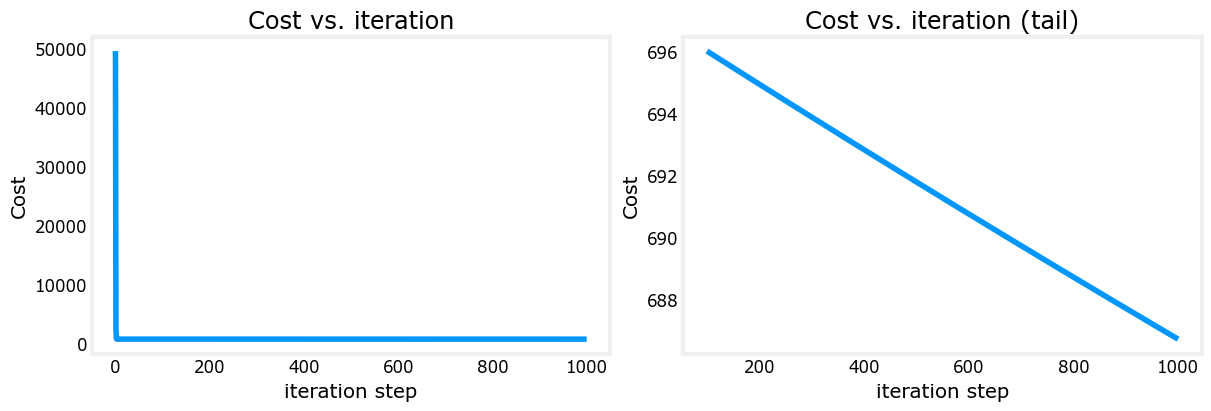

In [87]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history)
ax2.plot(100 + np.arange(len(J_history[100:])), J_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()